Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (\(\frac{вес\ в\ кг}{(рост\ в\ м)^2}\)).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes_data = pd.read_csv('data/diabetes_data.csv')
#diabetes_data.head()

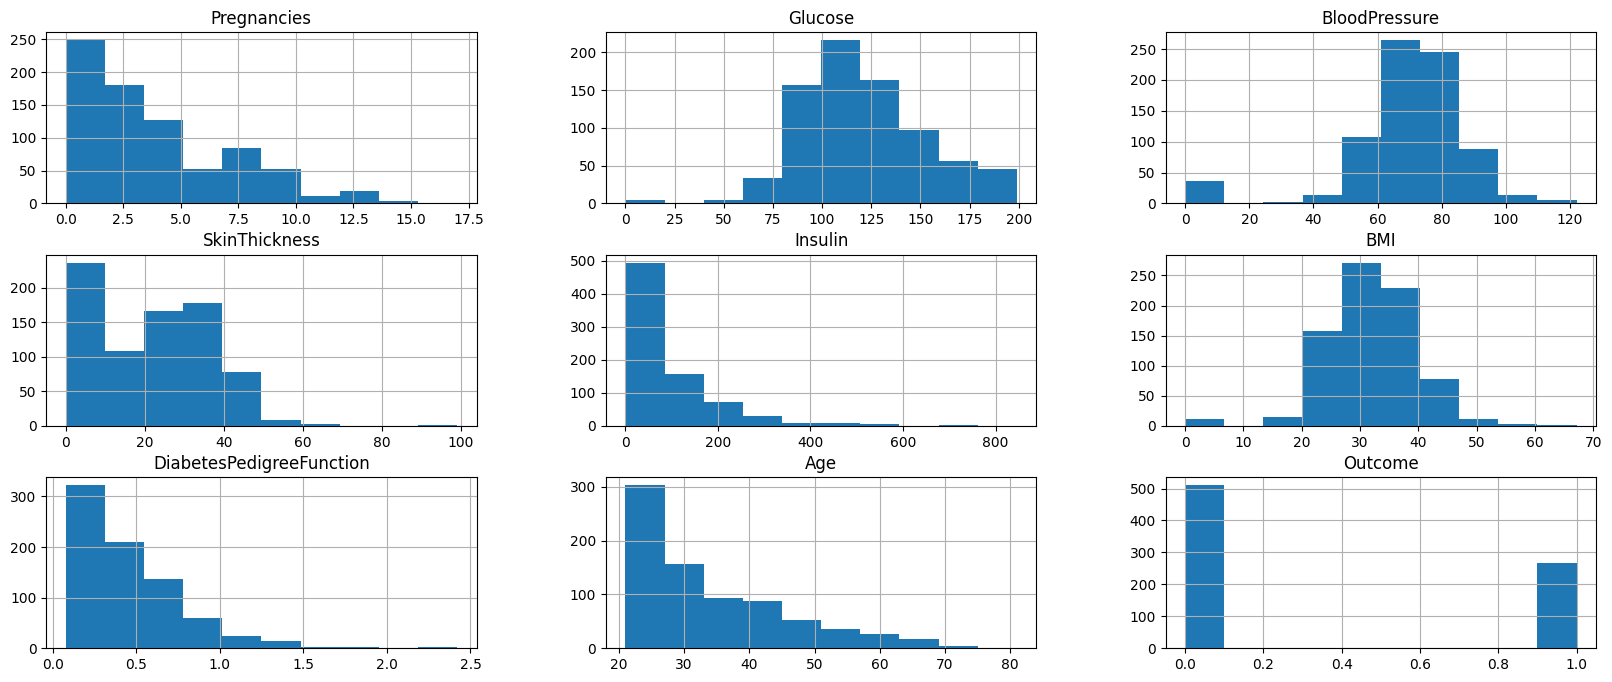

In [2]:

diabetes_data.hist(figsize=(20, 8));

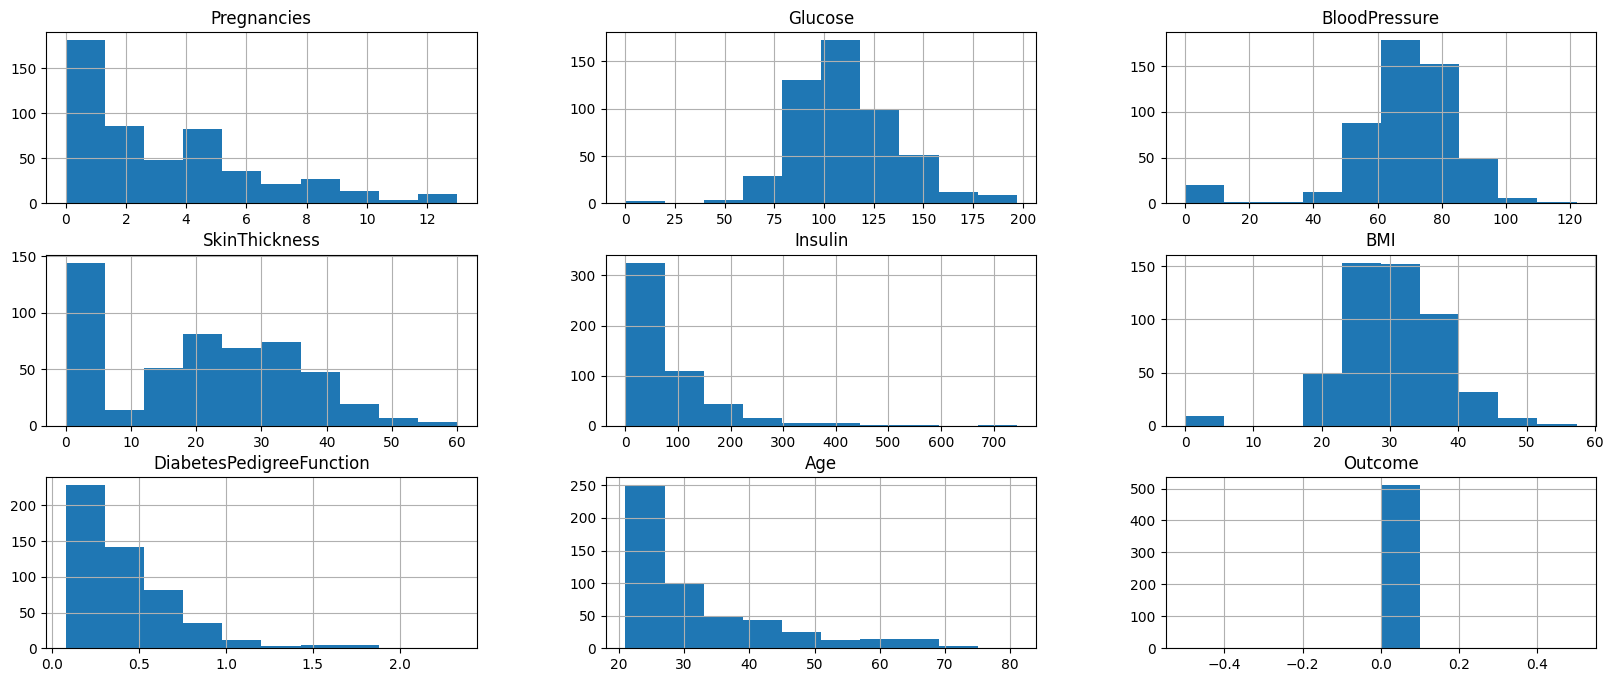

In [8]:
#Outcome — наличие диабета (0 — нет, 1 — да).
mask = diabetes_data['Outcome']==0
diabetes_data[mask].hist(figsize=(20, 8));


<AxesSubplot: xlabel='Age', ylabel='BMI'>

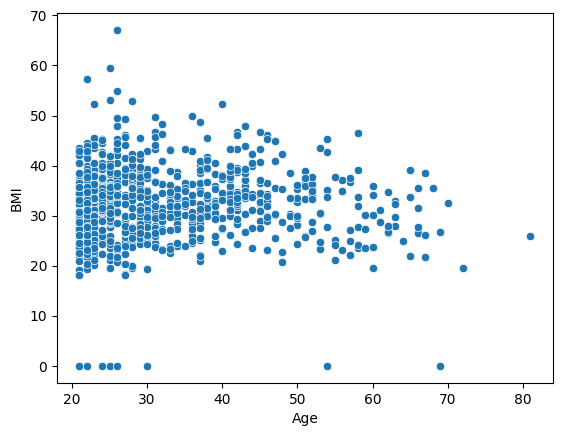

In [11]:
sns.scatterplot(data = diabetes_data, x='Age', y='BMI')


Задание 8.1
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [34]:
dupl_columns = list(diabetes_data.columns)
#dupl_columns.remove('id')

mask = diabetes_data.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes_data[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
#diabetes_duplicates

Число найденных дубликатов: 10


In [39]:
diabetes_dedupped = diabetes_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')


Результирующее число записей: 768


In [40]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
diabetes_dedupped = diabetes_dedupped.drop('Gender', axis=1)
print(f'Результирующее число признаков: {diabetes_dedupped.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


In [42]:
display(diabetes_dedupped.isnull().mean())
#diabetes_dedupped.tail()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [43]:
display(diabetes_dedupped)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [44]:
cols = list(diabetes_dedupped.columns)
cols_nul = list(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
for col in cols_nul:
    diabetes_dedupped.loc[ diabetes_dedupped[col] == 0, col] = np.nan
    #if diabetes_dedupped[col] == 0:
      #  diabetes_dedupped[col] = np.nan
diabetes_dedupped.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1
767,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0


In [45]:
display(diabetes_dedupped.isnull().mean())

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [49]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes_dedupped.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes_dedupped = diabetes_dedupped.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть более 2 пропусков
diabetes_dedupped = diabetes_dedupped.dropna(thresh=6, axis=0)
#отображаем результирующую долю пропусков
diabetes_dedupped.isnull().mean()
diabetes_dedupped.shape

(761, 8)

In [59]:
#Задание 8.6 В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.
cols = list(diabetes_dedupped.columns)

values = {}

for col in cols:
    values[col]=diabetes_dedupped[col].median()

#заполняем пропуски в соответствии с заявленным словарем
diabetes_dedupped = diabetes_dedupped.fillna(values)

diabetes_dedupped['SkinThickness'].mean()

29.109067017082786

In [60]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes_dedupped, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


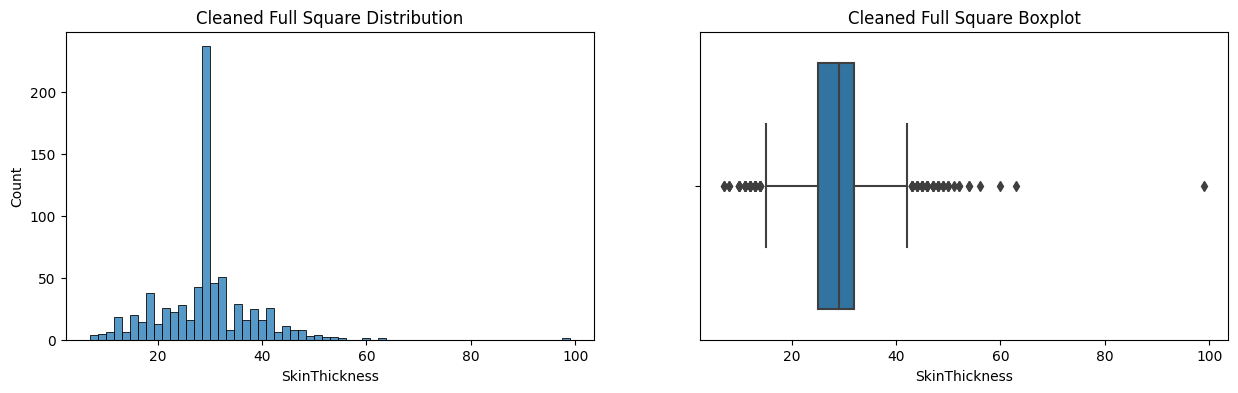

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=diabetes_dedupped, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=diabetes_dedupped, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [63]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score(diabetes_dedupped, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [64]:
diabetes_dedupped.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes_dedupped, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [66]:
def outliers_iqr(data, feature, log_scale=True):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes_dedupped, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761
